In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/markmandel/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/markmandel/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
df_inoculum = pd.read_excel('data/squid_competition_1.xlsx', sheetname='inoculum')
df = pd.read_excel('data/squid_competition_1.xlsx', sheetname='squid')
df.head(5)

,competition,animal,blue,white
0,2,1,175,121
1,2,1,176,118
2,2,2,420,37
3,2,2,504,45
4,2,3,298,12


Not what we are looking for obviously, but a reminder that `pandas` has some built-in plotting functionality.

# Average the inoculum counts and normalize the squid counts to the inoculum

In [15]:
df_inoculum['ratioWB'] = df_inoculum['white']/df_inoculum['blue']
df_inoculum

,competition,blue,white,ratioWB
0,1,0,0,NaN
1,1,0,0,NaN
2,2,154,121,0.785714
3,2,129,109,0.844961
4,4,148,102,0.689189
5,4,163,96,0.588957
6,5,172,100,0.581395
7,5,200,129,0.645000


In [18]:
df_inoculum.groupby(['competition']).mean()

,blue,white,ratioWB
competition,,,
1,0.0,0.0,NaN
2,141.5,115.0,0.815338
4,155.5,99.0,0.639073
5,186.0,114.5,0.613198


In [21]:
df['ratioWB'] = df['white']/df['blue']
df.head(5)

,competition,animal,blue,white,ratioWB
0,2,1,175,121,0.691429
1,2,1,176,118,0.670455
2,2,2,420,37,0.088095
3,2,2,504,45,0.089286
4,2,3,298,12,0.040268


In [22]:
df.groupby(['competition', 'animal']).mean()

blue  white   ratioWB
competition animal                        
2           1       175.5  119.5  0.680942
            2       462.0   41.0  0.088690
            3       300.0   13.0  0.043313
            4       180.0   77.5  0.431370
            5       724.5   12.5  0.017284
4           1       413.5   16.5  0.039891
            2       261.5    8.5  0.032536
            3       286.5    1.5  0.005169
            4       136.5    0.0  0.000000
            5       449.0    0.5  0.001279
5           1        96.0  100.0  1.041707
            2       328.0  174.5  0.530348
            3       436.0  188.0  0.431748
            4       455.5   31.0  0.068179
            5       610.5   22.0  0.036115

In [34]:
df_inoculum_summary = df_inoculum.groupby(['competition'], as_index=False).mean()
df_inoculum_summary

,competition,blue,white,ratioWB
0,1,0.0,0.0,NaN
1,2,141.5,115.0,0.815338
2,4,155.5,99.0,0.639073
3,5,186.0,114.5,0.613198


In [48]:
df_summary = pd.merge(df, df_inoculum_summary[['competition', 'ratioWB']], on=['competition'])
df_summary.rename(columns={'ratioWB_x': 'ratioWB_o', 'ratioWB_y': 'ratioWB_i'}, inplace=True)
df_summary['CI'] = np.log10(df_summary['ratioWB_o'] / df_summary['ratioWB_i'])
df_summary.head(5)

,competition,animal,blue,white,ratioWB_o,ratioWB_i,CI
0,2,1,175,121,0.691429,0.815338,-0.071590
1,2,1,176,118,0.670455,0.815338,-0.084968
2,2,2,420,37,0.088095,0.815338,-0.966385
3,2,2,504,45,0.089286,0.815338,-0.960556
4,2,3,298,12,0.040268,0.815338,-1.306373


In [62]:
df_summary = df_summary.groupby(['competition', 'animal'], as_index=False).mean()
df_summary.head(5)

,competition,animal,blue,white,ratioWB_o,ratioWB_i,CI
0,2,1,175.5,119.5,0.680942,0.815338,-0.078279
1,2,2,462.0,41.0,0.088690,0.815338,-0.963470
2,2,3,300.0,13.0,0.043313,0.815338,-1.275795
3,2,4,180.0,77.5,0.431370,0.815338,-0.279291
4,2,5,724.5,12.5,0.017284,0.815338,-1.692186


# Plot using seaborn
## https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_categorical.html

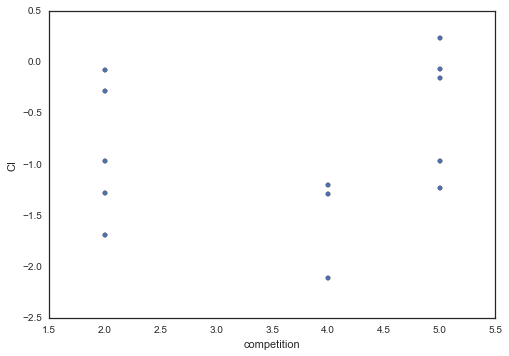

In [69]:
p = df_summary.plot.scatter('competition', 'CI')
p

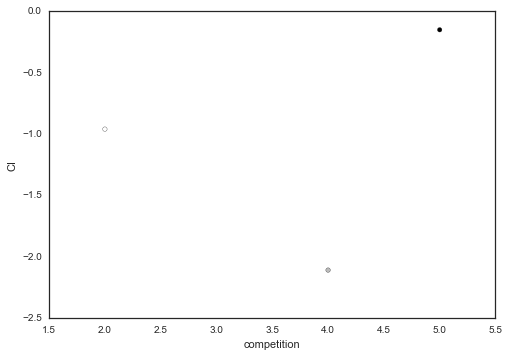

In [76]:
df_summary.groupby('competition', as_index=False).median().plot.scatter('competition', 'CI')

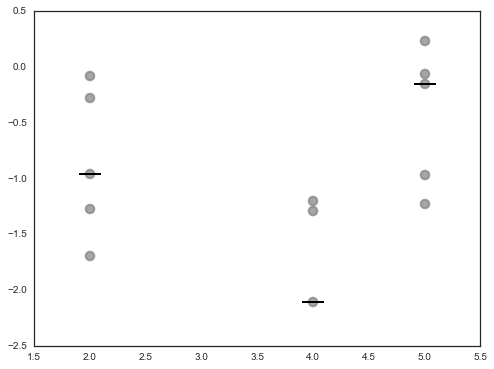

In [123]:
# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

plt.scatter(df_summary['competition'], df_summary['CI'], marker='o', s=75,
            color='gray', linewidths=2, alpha=0.7)

plt.scatter(df_summary.groupby('competition', as_index=False).median()['competition'], 
            df_summary.groupby('competition', as_index=False).median()['CI'], marker='_', s=500,
            color='black', linewidths=2, alpha=1.0)

# Show result on screen
plt.show()